In [232]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [233]:
"""Generic Dataset class"""
#Reusing thesame class use in assigment 1
class Dataset:
    def __init__(self, X: np.array , Y: np.array):
        self.X = X
        self.Y = Y
    
    def mean_norm(self):
        x_min, x_max = np.min(self.X), np.max(self.X)
        y_min, y_max = np.min(self.Y), np.max(self.Y) 
        range_x = x_max - x_min
        range_y = y_max - y_min
        mean_x = np.mean(self.X)
        mean_y = np.mean(self.Y)
        self.X = (self.X-mean_x)/range_x
        self.Y = (self.Y-mean_y)/range_y

    def feature_scaling(self):
        max_x = np.max(self.X)
        max_y = np.max(self.Y)
        self.X = self.X / max_x
        self.y = self.Y / max_y


In [234]:
raw = pd.read_csv("dataset-1.csv", header=0)
raw.head()

mark1      mark2  accepted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1

In [235]:

marks = raw.to_numpy()[:,0:2]
accepted =raw.to_numpy()[:,2].reshape((-1,1))
print(f'The shape of marks is {np.shape(marks)}')
print(f'The shape of accepted is {np.shape(accepted)}')

The shape of marks is (100, 2)
The shape of accepted is (100, 1)


Text(0, 0.5, 'mark 2')

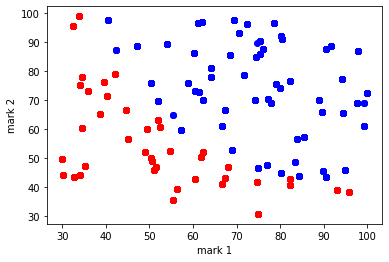

In [236]:
def plot_acceptance(coords, acceptance):
    accepted_x = []
    accepted_y = []
    not_accepted_x = []
    not_accepted_y = []
    for i in range(len(acceptance)):
        if acceptance[i,0] == 1:
            accepted_x.append(coords[i,0])
            accepted_y.append(coords[i,1])
        else:
            not_accepted_x.append(coords[i,0])
            not_accepted_y.append(coords[i,1])
        plt.scatter(accepted_x, accepted_y, c='blue')
        plt.scatter(not_accepted_x,not_accepted_y, c = 'red')
plot_acceptance(marks, accepted)
plt.xlabel('mark 1')
plt.ylabel('mark 2')

In [237]:

class logistic_regression:
    def __init__(self, data: Dataset, learnig_rate):
        self.X = dataset.X
        self.Y = dataset.Y
        self.m = len(self.Y)
        #add x0 = 0
        self.Xmat = np.concatenate([np.ones((self.m, 1)), self.X], axis=1)
        #initialize theta vector with random numbers
        self.theta = np.random.rand(np.shape(self.X)[1]+1,1)
        self.learnig_rate = learnig_rate
        self.hx = 1/(1+np.exp(-self.Xmat@self.theta))
        #e = 0.0000000001
        #self.cost = -(1/self.m)*np.sum(self.Y *np.log(self.hx) + (1-self.Y)*np.log(1-self.hx+e))
        self.cost = -(1/self.m)*np.sum(self.Y *np.log(self.hx) + (1-self.Y)*np.log(1-self.hx))

    def train(self):
        self.grad = self.grad = self.Xmat.T@ (self.hx - self.Y)

    def update(self):
        self.theta = self.theta - (self.learnig_rate/self.m)*self.grad
        self.hx = 1/(1+np.exp(-self.Xmat@self.theta))
        self.cost = -(1/self.m)*np.sum(self.Y *np.log(self.hx) + (1-self.Y)*np.log(1-self.hx))

    def predict(self):
        #round no nearest integer 0 or 1
        return np.rint(1/(1+np.exp(-self.Xmat@self.theta))) 




In [238]:
dataset = Dataset(marks, accepted)
'''is necesary to do feature scaling, i.e divide X by 100, becouse the X values are too big, and it couses that h(x) goes to 1 , therefore log(1-h(x)) is undefine and gives NaN
- an other solution could be to initilize some thetas with negative numbres
- or adding an epsilon 
'''
dataset.feature_scaling()

In [247]:
model = logistic_regression(dataset, 0.01)

Text(0.5, 1.0, 'Cost')

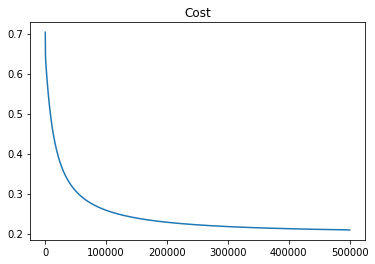

In [248]:
'''Training Loop'''

error= []
error.append(model.cost)
for i in range(500000):
    model.train()
    model.update()
    error.append(model.cost)
plt.plot(error)
plt.title('Cost')

Text(0.5, 1.0, 'Model prediction for dataset 1, post trining')

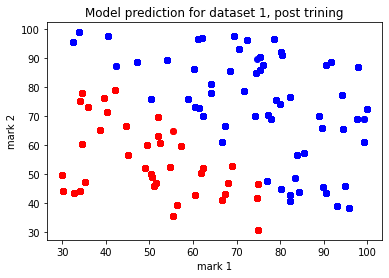

In [353]:
plot_acceptance(marks, model.predict())
plt.xlabel('mark 1')
plt.ylabel('mark 2')
plt.title('Model prediction for dataset 1, post trining')

Text(0, 0.5, 'mark 2')

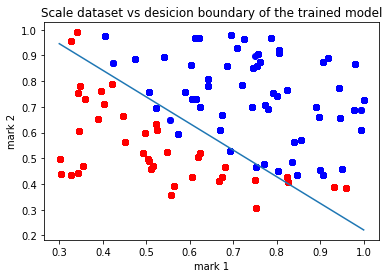

In [388]:
x = np.linspace(0.3,1,1000)
y = -(model.theta[1,0]*x+model.theta[0,0])/model.theta[2,0]

plt.plot(x,y)
plot_acceptance(marks/np.max(marks), accepted)
plt.title('Scale dataset vs desicion boundary of the trained model')
plt.xlabel('mark 1')
plt.ylabel('mark 2')

In [398]:
raw2 = pd.read_csv("dataset-2.csv", header=0)
raw2.head()

test1    test2  accepted
0  0.051267  0.69956         1
1 -0.092742  0.68494         1
2 -0.213710  0.69225         1
3 -0.375000  0.50219         1
4 -0.513250  0.46564         1

The shape of  tests is (118, 2)
The shape of accepted is (118, 1)


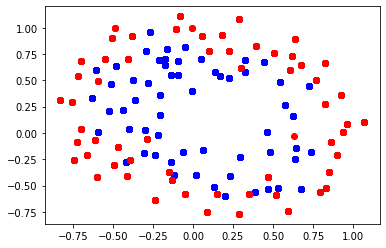

In [399]:
tests = raw2.to_numpy()[:,0:2]
accepted =raw2.to_numpy()[:,2].reshape((-1,1))
print(f'The shape of  tests is {np.shape(tests)}')
print(f'The shape of accepted is {np.shape(accepted)}')

plot_acceptance(tests, accepted)

In [400]:
'''First we try the non modified dataset 2 to prove that it doest work'''
dataset = Dataset(tests,accepted)
model = logistic_regression(dataset, 0.01)


Text(0.5, 1.0, 'Cost')

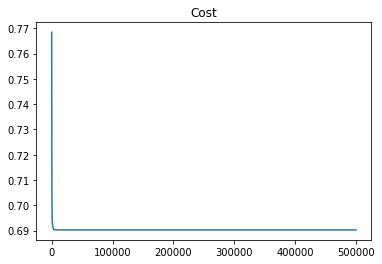

In [401]:
'''Training Loop'''
error= []
error.append(model.cost)
for i in range(500000):
    model.train()
    model.update()
    error.append(model.cost)
plt.plot(error)
plt.title('Cost')

' we can clearly see that the model doest work becouse the sesition boundary is not linear'

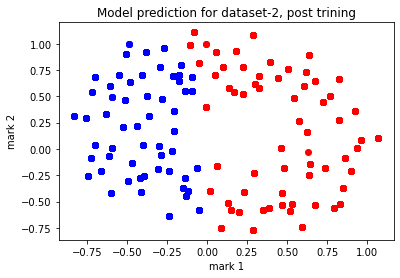

In [403]:
plot_acceptance(tests, model.predict())
plt.xlabel('mark 1')
plt.ylabel('mark 2')
plt.title('Model prediction for dataset-2, post trining')

''' we can clearly see that the model doest work becouse the sesition boundary is not linear'''

In [407]:
'''Now we do the same, but for the modified dataset'''

raw3 = pd.read_csv("dataset-2-modified.csv", header=None)
raw3.head()


0         1        2         3         4         5         6         7   \
0   1  0.051267  0.69956  0.002628  0.035864  0.489384  0.000135  0.001839   
1   1 -0.092742  0.68494  0.008601 -0.063523  0.469143 -0.000798  0.005891   
2   1 -0.213710  0.69225  0.045672 -0.147941  0.479210 -0.009761  0.031616   
3   1 -0.375000  0.50219  0.140625 -0.188321  0.252195 -0.052734  0.070620   
4   1 -0.513250  0.46564  0.263426 -0.238990  0.216821 -0.135203  0.122661   

         8         9   ...        18        19        20            21  \
0  0.025089  0.342354  ...  0.000900  0.012278  0.167542  1.815630e-08   
1 -0.043509  0.321335  ...  0.002764 -0.020412  0.150752  6.362953e-07   
2 -0.102412  0.331733  ...  0.015151 -0.049077  0.158970  9.526844e-05   
3 -0.094573  0.126650  ...  0.017810 -0.023851  0.031940  2.780914e-03   
4 -0.111283  0.100960  ...  0.026596 -0.024128  0.021890  1.827990e-02   

             22        23        24        25        26        27  
0  2.477505e-07  0.000003  0.000046  0.000629  0.008589  0.117206  
1 -4.699318e-06  0.000035 -0.000256  0.001893 -0.013981  0.103256  
2 -3.085938e-04  0.001000 -0.003238  0.010488 -0.033973  0.110047  
3 -3.724126e-03  0.004987 -0.006679  0.008944 -0.011978  0.016040  
4 -1.658422e-02  0.015046 -0.013650  0.012384 -0.011235  0.010193  

[5 rows x 28 columns]

The shape of  x is (118, 26)
The shape of accepted is (118, 1)


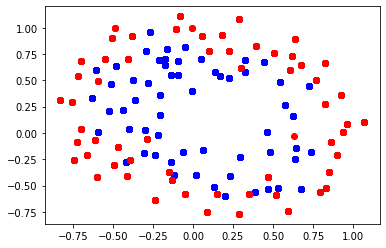

In [410]:
x = raw3.to_numpy()[:,1:-1]#remove the first colum of 1, to be consistant, ad the model adds it latter
accepted =raw2.to_numpy()[:,2].reshape((-1,1))
print(f'The shape of  x is {np.shape(x)}')
print(f'The shape of accepted is {np.shape(accepted)}')

array([[ 5.12670000e-02,  6.99560000e-01,  2.62830529e-03, ...,
         4.61305487e-05,  6.29470940e-04,  8.58939846e-03],
       [-9.27420000e-02,  6.84940000e-01,  8.60107856e-03, ...,
        -2.56322636e-04,  1.89305413e-03, -1.39810280e-02],
       [-2.13710000e-01,  6.92250000e-01,  4.56719641e-02, ...,
        -3.23789996e-03,  1.04882142e-02, -3.39734512e-02],
       ...,
       [-4.84450000e-01,  9.99270000e-01,  2.34691802e-01, ...,
        -1.13447630e-01,  2.34007252e-01, -4.82684337e-01],
       [-6.33640000e-03,  9.99270000e-01,  4.01499650e-05, ...,
        -2.53849495e-07,  4.00328554e-05, -6.31330588e-03],
       [ 6.32650000e-01, -3.06120000e-02,  4.00246023e-01, ...,
        -7.26382966e-06,  3.51474517e-07, -1.70067777e-08]])